### keras DNN으로 집값 예측하기

1. 패키지 수입 및 파라미터 설정

In [1]:
# import 
import pandas as pd # 데이터 저장 프레임
import matplotlib.pyplot as plt # 그래프 변환 라이브러리
import seaborn as sns 
from time import time

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense




In [2]:
# 파라미터
MY_HIDDEN = 1000
MY_EPOCH = 500

# 중간에 ... 이라고 되어있는 부분까지 다 보이게 하는 것
pd.set_option('display.max_columns', None) 

2. 데이터 처리

In [3]:
# 데이터 읽기
raw = pd.read_csv('/content/drive/MyDrive/data/housing.csv')

# 데이터 샘플 10개 출력
print(raw.head(10))

# 데이터 통계 출력
print(raw.describe())

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  
5   5.

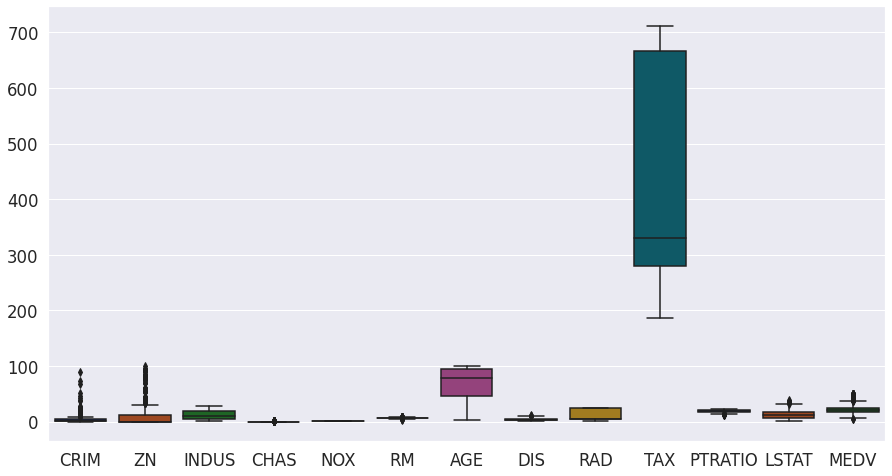

In [4]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=1.5)
sns.boxplot(data=raw, palette='dark')


In [5]:
# z-점수 정규화
#scaler = StandardScaler()
scaler = MinMaxScaler()
z_data = scaler.fit_transform(raw)

# 데이터 형식 출력
print(type(raw))
print(type(z_data))

# numpy를  pandas로 재전환
z_data = pd.DataFrame(z_data)
print(type(z_data))

# z-점수 정규화 된 데이터 샘플 출력
print(z_data.head(10))


<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
         0      1         2    3         4         5         6         7   \
0  0.000000  0.180  0.067815  0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.000  0.242302  0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.000  0.242302  0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.000  0.063050  0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.000  0.063050  0.0  0.150206  0.687105  0.528321  0.448545   
5  0.000264  0.000  0.063050  0.0  0.150206  0.549722  0.574665  0.448545   
6  0.000921  0.125  0.271628  0.0  0.286008  0.469630  0.656025  0.402923   
7  0.001554  0.125  0.271628  0.0  0.286008  0.500287  0.959835  0.438387   
8  0.002303  0.125  0.271628  0.0  0.286008  0.396628  1.000000  0.450354   
9  0.001840  0.125  0.271628  0.0  0.286008  0.468097  0.854789  0.496731   

         8         9         10        11        12 

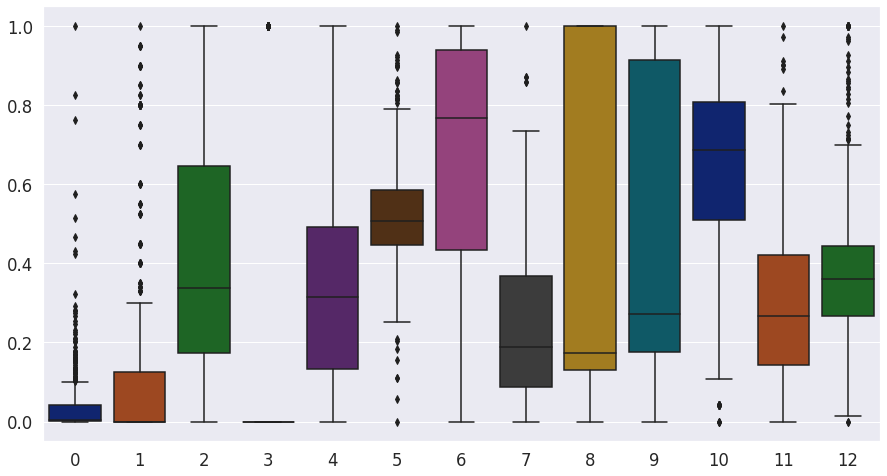

In [6]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=1.5)
sns.boxplot(data=z_data, palette='dark')

In [7]:
# 데이터 모양 출력
print('분리 전:',z_data.shape)

#  데이터를 입력과 출력으로 분리
X_data = z_data.drop(10, axis=1)

# 과제 6번 CRIM빼기
#X_data = X_data.drop(0, axis=1) 열을 빼는 거니까 1축으로

Y_data = z_data[10]



# 데이터 모양 출력
print('분리 후:')
print(X_data.shape)
print(Y_data.shape)

분리 전: (506, 13)
분리 후:
(506, 12)
(506,)


In [8]:
# 데이터 4분할
X_train, X_test, Y_train, Y_test = train_test_split(X_data, 
                                                    Y_data,
                                                    train_size=0.7)
# 최종 데이터 모양 출력
print('학습용 입력 데이터 모양:', X_train.shape)
print('학습용 출력 데이터 모양:', Y_train.shape)
print('평가용 출력 데이터 모양:', X_test.shape)
print('평가용 출력 데이터 모양:', Y_test.shape)

학습용 입력 데이터 모양: (354, 12)
학습용 출력 데이터 모양: (354,)
평가용 출력 데이터 모양: (152, 12)
평가용 출력 데이터 모양: (152,)


3. 인공 신경망 구현

In [9]:
model = Sequential()

input = X_train.shape[1]
       
# 입력층과 은닉층 1 추가(입력층과 은닉층 합쳐서)
model.add(Dense(units=MY_HIDDEN,
                input_dim=input,
                activation='relu'))

# 은닉층 2 추가 
model.add(Dense(units=MY_HIDDEN,
                 activation='relu'))

# 은닉층 3 추가 (과제 3번)
#model.add(Dense(units=500, activation='relu'))
# 은닉층 4 추가
#model.add(Dense(units=500, activation='relu'))

# 출력층 추가
model.add(Dense(units=1))

print('DNN 요약')
model.summary()


DNN 요약
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              13000     
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1001      
Total params: 1,015,001
Trainable params: 1,015,001
Non-trainable params: 0
_________________________________________________________________


4. 인공 신경망 학습

In [10]:
# 학습 환경설정
model.compile(optimizer='adam',
              loss='mae')

print('학습 시작')
begin = time()

model.fit(x=X_train, 
          y=Y_train,
          epochs=MY_EPOCH, 
       verbose=0)

end = time()
print('총 학습 시간: {:.2f}초'.format(end - begin))


학습 시작
총 학습 시간: 9.33초


5. 인공 신경망 평가

In [11]:
# 신경망 평가
# 평가용이니까  test
loss = model.evaluate(x=X_test,
                      y=Y_test,
                      verbose=0)
# .2 소수점 2자리까지라는 뜻/ .2f 포맷
print('최종 손실값: {:.2f}'.format(loss))
print('최종 손실값:',loss)

최종 손실값: 0.05
최종 손실값: 0.046925365924835205


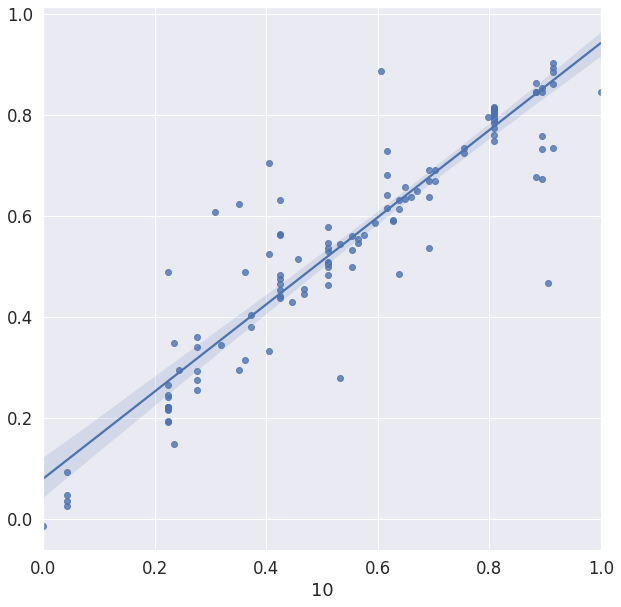

In [12]:
# DNN으로 예측
pred = model.predict(x=X_test)
plt.figure(figsize=(10, 10))

sns.regplot(x=Y_test,
            y=pred)


In [13]:
#print('첫번째 평가용 데이터 입력')
#print(X_test[0])

#print('첫번째 평가용 데이터 출력')
#print(Y_test[0])
